In [2]:
import matplotlib.pyplot as plt
from skimage import io, transform
import scipy
from scipy import ndimage
import numpy as np
import math

In [3]:
fpath = './'
image = io.imread(fpath + 'cameraman.tif')
imageTranslated = np.zeros(np.shape(image))

In [4]:
# make transform Translation -> Rotation -> Translation
iMax, jMax = np.shape(image)

Tx = - (0 + (iMax-1)) / 2
Ty = - (0 + (jMax-1)) / 2
Translation = np.array([[1, 0, 0], [0, 1, 0], [Tx, Ty, 1]]) # Transform matrix for translation
print(Translation)

Theta = math.radians(30)
Rotation = np.array([[math.cos(Theta), math.sin(Theta), 0], [-math.sin(Theta), math.cos(Theta), 0], [0, 0, 1]]) # Transform matrix for rotation

T = np.array([[1, 0, 0], [0, 1, 0], [-Tx, -Ty, 1]]) # Transformation matrix
#T = numpy.linalg.inv(T)

#T1 = np.array([[math.cos(Theta), -math.sin(Theta), Tx*(math.cos(Theta)-1)-Ty*(math.sin(Theta))], [math.sin(Theta), math.cos(Theta), Ty*(math.cos(Theta)-1)-Tx*(math.sin(Theta))], [0, 0, 1]])

print(Rotation)
print(T)

[[   1.     0.     0. ]
 [   0.     1.     0. ]
 [-127.5 -127.5    1. ]]
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[[  1.    0.    0. ]
 [  0.    1.    0. ]
 [127.5 127.5   1. ]]


In [5]:
# apply transform
iTranslated = 0
while iTranslated < iMax:

    jTranslated = 0
    while jTranslated < jMax:
        pixel_data = image[iTranslated, jTranslated]
        input_coords = np.array([iTranslated, jTranslated, 1])
        trans_coords = np.dot(input_coords, Translation)
        rota_coords = np.dot(trans_coords, Rotation)
        interp_coords = np.interp(rota_coords)
        i_out, j_out, _ = np.dot(interp_coords, T)
        
        #i_out, j_out, _ = np.dot(input_coords, T1)
        #print(i_out, j_out)
        if i_out < 256 and i_out > 0 and j_out < 256 and j_out > 0:
            imageTranslated[int(i_out), int(j_out)] = pixel_data
            #imageTranslated[i_out, j_out] = pixel_data
            
        jTranslated = jTranslated + 1
    iTranslated = iTranslated + 1

TypeError: interp() missing 2 required positional arguments: 'xp' and 'fp'

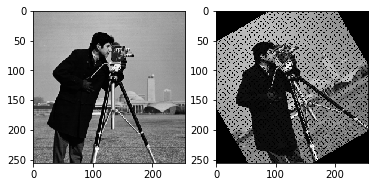

In [54]:
# Check result
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imageTranslated, cmap='gray')
plt.show()

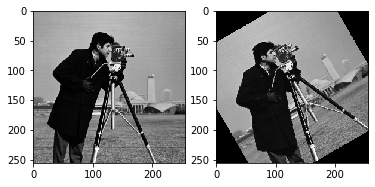

In [50]:
from PIL import Image
image1 = Image.open('./cameraman.tif')
rotated = image1.rotate(30)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(rotated, cmap='gray')
plt.show()

array([[156, 159, 158, ..., 151, 152, 152],
       [160, 154, 157, ..., 154, 155, 153],
       [156, 159, 158, ..., 151, 152, 152],
       ...,
       [114, 132, 123, ..., 135, 137, 114],
       [121, 126, 130, ..., 133, 130, 113],
       [121, 126, 130, ..., 133, 130, 113]], dtype=uint8)

[[156 159 158]
 [160 154 157]
 [156 159 158]]


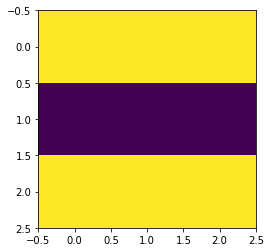